In [1]:
#Lets import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import the data
data=pd.read_csv("space.csv")

In [3]:
#Lets check the shape of our dataset
data.shape

(10000, 18)

We have 10000 rows and 18 columns

In [4]:
#Lets check the data type
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Except the target variable class all other feature's data type are of numeric.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


We dont have any missing values as well

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


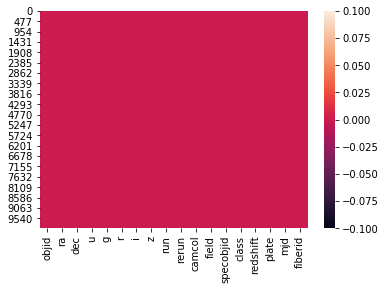

In [6]:
#Lets check again
print(data.isnull().sum())
sns.heatmap(data.isnull())

There are no null values found

# Since we dont have any missing values or null we can proceed to the visualization part

In [7]:
#Lets check for the categorical data
print(data.select_dtypes(include=object))

       class
0       STAR
1       STAR
2     GALAXY
3       STAR
4       STAR
...      ...
9995  GALAXY
9996  GALAXY
9997    STAR
9998  GALAXY
9999  GALAXY

[10000 rows x 1 columns]


We just have our target variable as categorical feature

In [8]:
#Lets check the value count
data["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

So we have 3 unique values Galaxy,star and QSO for further processing lets convert them into categorical one

In [9]:
#Lets map galaxy star and QSO to 0,1,2 respectively
data["class"]=data["class"].map({"GALAXY":0,"STAR":1,"QSO":2})

In [10]:
data["class"].value_counts()

0    4998
1    4152
2     850
Name: class, dtype: int64

So its mapped now all the feature that we have now are of numeric types

In [11]:
#Lets see the unique value counts of all the 18 features
data.apply(lambda x:len(x.unique()))

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

Objectid and rerun  has only 1 unique value

In [12]:
for i in data:
    print('\n%s column : '%i)
    print(data[i].value_counts())


objid column : 
1.237650e+18    10000
Name: objid, dtype: int64

ra column : 
226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64

dec column : 
 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64

u column : 
18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64

g column : 
17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64

r column : 
15.99986    3
16.48978    3
16.70929    2
17.21182    2
16

# Univariate Analysis

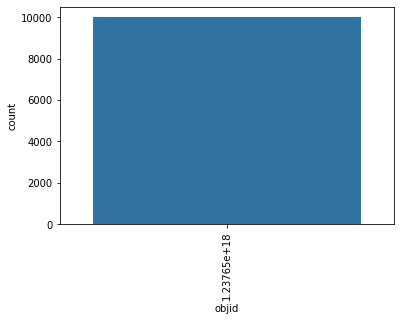



1.237650e+18    10000
Name: objid, dtype: int64


In [13]:
#Lets check count of object id
data["objid"].value_counts()
plt.figure(figsize=[6,4])
sns.countplot(data["objid"])
plt.xticks(rotation=90)
plt.show()

print("\n")


print(data["objid"].value_counts())

So we have 10000 entries having same value for feature "objid"

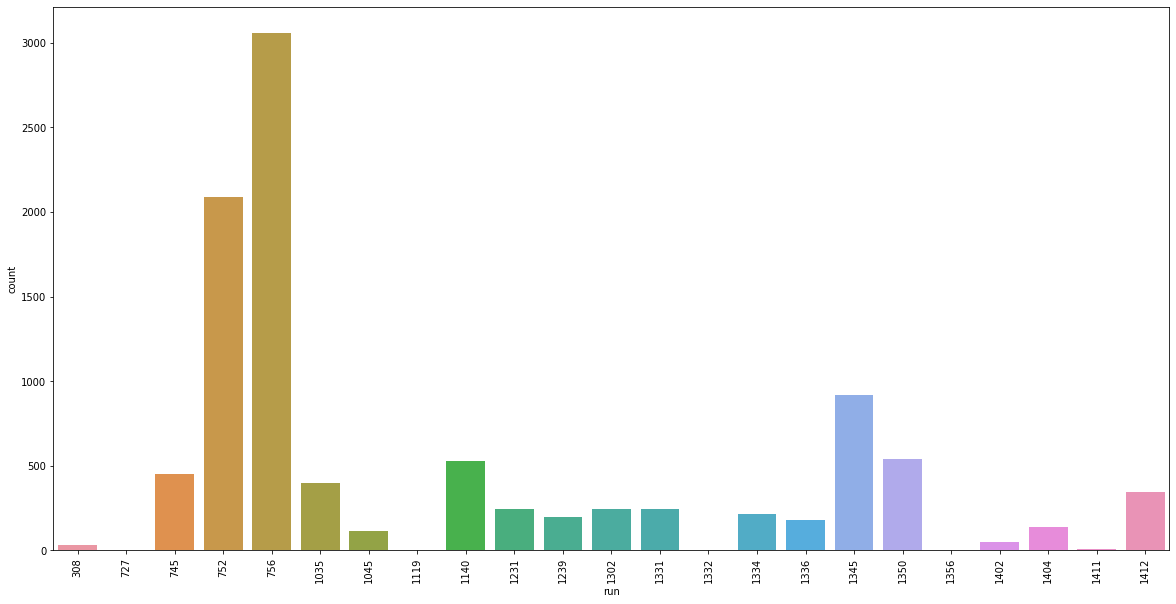



756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64


In [14]:
#Lets check count of run
data["run"].value_counts()
plt.figure(figsize=[20,10])
sns.countplot(data["run"])
plt.xticks(rotation=90)
plt.show()

print("\n")


print(data["run"].value_counts())

756 run number has the max count of 3060,wheras 752 counts 2086
1356,727 counts just 4 and 1119,1332 counts the least

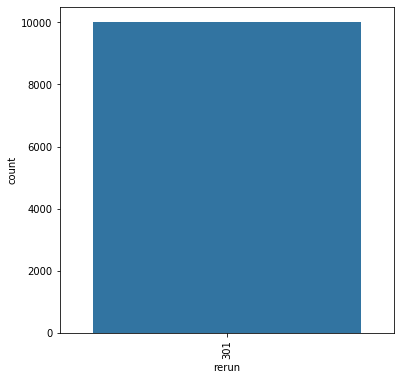



301    10000
Name: rerun, dtype: int64


In [15]:
#Lets check count of run
data["rerun"].value_counts()
plt.figure(figsize=[6,6])
sns.countplot(data["rerun"])
plt.xticks(rotation=90)
plt.show()

print("\n")


print(data["rerun"].value_counts())

Rerun is equal to 301 for all the 10000 entries

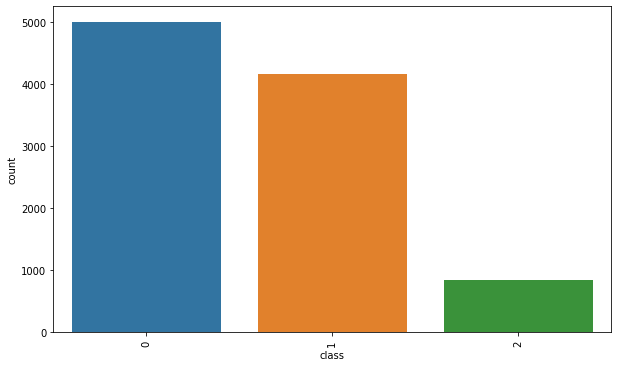



0    4998
1    4152
2     850
Name: class, dtype: int64


In [16]:
#Lets check count of run
data["class"].value_counts()
plt.figure(figsize=[10,6])
sns.countplot(data["class"])
plt.xticks(rotation=90)
plt.show()

print("\n")


print(data["class"].value_counts())

So we have 4998 entries for galaxy,4152 for stars and 850 for QSO

# Bivariate Analysis

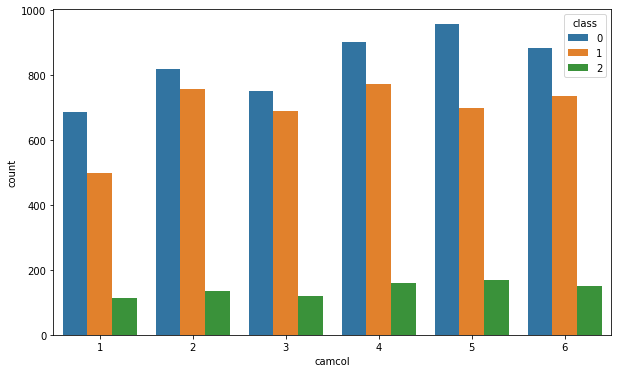

camcol  class
1       0        687
        1        497
        2        114
2       0        818
        1        758
        2        136
3       0        752
        1        690
        2        118
4       0        901
        1        772
        2        161
5       0        957
        1        700
        2        170
6       0        883
        1        735
        2        151
Name: class, dtype: int64


In [20]:
plt.figure(figsize=[10,6])
sns.countplot(x="camcol",data=data,hue="class")
plt.show()


print(data.groupby("camcol")["class"].value_counts())

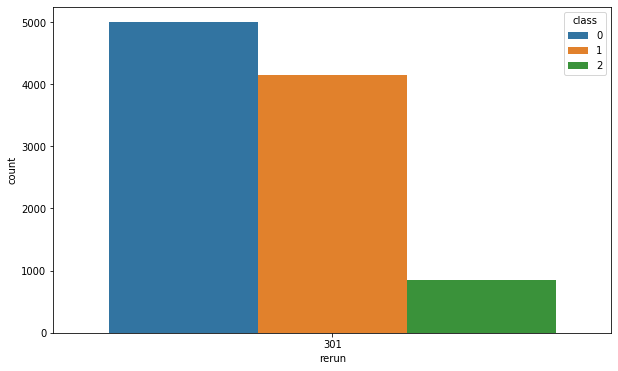

rerun  class
301    0        4998
       1        4152
       2         850
Name: class, dtype: int64


In [21]:
plt.figure(figsize=[10,6])
sns.countplot(x="rerun",data=data,hue="class")
plt.show()


print(data.groupby("rerun")["class"].value_counts())

# Statistical Analysis

In [23]:
#Lets check the statistical analysis
data.describe(include="all")

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.585200,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.642481,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


Observations

1.Galaxy is the one which is repeated the most which is having frequency of 4998.

2.Mean>Median --->dec,run,field,redshift,plate,mjid,fiberid are right skewed.

3.Mean< Median----->ra,specobjid,class are left skewed.
    
4.Nearly noramally distrubuted----->objid,u,g,r,i,z,rerun,camcol are likely to be normal.
    
5.Outliers found in ra,dec,r,i,z,run,field,specobjid,redshift,plate,fiberid
    


In [24]:
#Lets see the skewness
data.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.641904
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

objid           AxesSubplot(0.125,0.657941;0.110714x0.222059)
ra           AxesSubplot(0.257857,0.657941;0.110714x0.222059)
dec          AxesSubplot(0.390714,0.657941;0.110714x0.222059)
u            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
g            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
r            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
i               AxesSubplot(0.125,0.391471;0.110714x0.222059)
z            AxesSubplot(0.257857,0.391471;0.110714x0.222059)
run          AxesSubplot(0.390714,0.391471;0.110714x0.222059)
rerun        AxesSubplot(0.523571,0.391471;0.110714x0.222059)
camcol       AxesSubplot(0.656429,0.391471;0.110714x0.222059)
field        AxesSubplot(0.789286,0.391471;0.110714x0.222059)
specobjid          AxesSubplot(0.125,0.125;0.110714x0.222059)
class           AxesSubplot(0.257857,0.125;0.110714x0.222059)
redshift        AxesSubplot(0.390714,0.125;0.110714x0.222059)
plate           AxesSubplot(0.523571,0.125;0.110714x0.222059)
mjd     

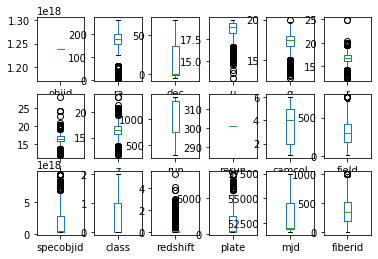

In [25]:
#Lets see the outliers
data.plot(kind="box",layout=(3,6),subplots=True)

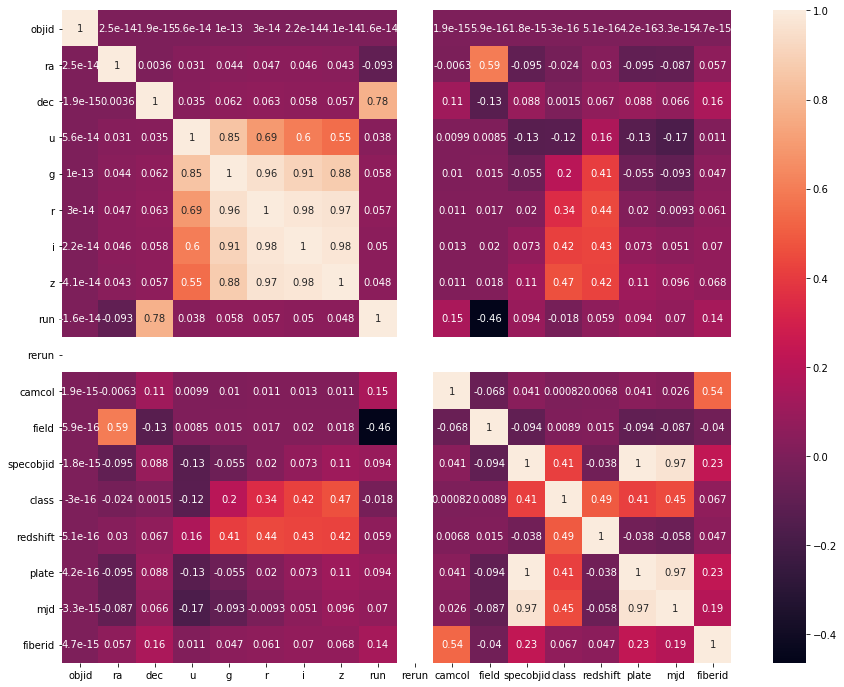

In [26]:
#Lets check the corelation between them
plt.figure(figsize=(15,12))
sns.heatmap(data.corr() ,annot=True)
plt.show()

In [27]:
#Lets see pearson coefficienta and pvalues
import scipy

In [28]:
scipy.stats.pearsonr(data["class"], data["ra"])

(-0.02399917131027588, 0.016396740054019927)

In [29]:
scipy.stats.pearsonr(data["class"], data["dec"])

(0.001451253171513782, 0.8846261927511995)

In [30]:
scipy.stats.pearsonr(data["class"], data["u"])

(-0.12200959825954516, 1.782238944289364e-34)

In [31]:
scipy.stats.pearsonr(data["class"], data["g"])

(0.20074840732089527, 1.9670029203964336e-91)

In [32]:
scipy.stats.pearsonr(data["class"], data["r"])

(0.34489979902327406, 2.554275505895635e-277)

In [33]:
scipy.stats.pearsonr(data["class"], data["i"])

(0.4176314386577862, 0.0)

In [34]:
scipy.stats.pearsonr(data["class"], data["z"])

(0.4654747316876977, 0.0)

In [35]:
scipy.stats.pearsonr(data["class"], data["run"])

(-0.01795842453088635, 0.07253225567466538)

In [36]:
scipy.stats.pearsonr(data["class"], data["camcol"])

(0.0008228445629396982, 0.9344286829392775)

In [37]:
scipy.stats.pearsonr(data["class"], data["field"])

(0.008897368788583947, 0.37365746831680335)

In [38]:
scipy.stats.pearsonr(data["class"], data["specobjid"])

(0.4146768269918828, 0.0)

In [39]:
scipy.stats.pearsonr(data["class"], data["redshift"])

(0.4926106417214762, 0.0)

In [40]:
scipy.stats.pearsonr(data["class"], data["plate"])

(0.41467761313374696, 0.0)

In [41]:
scipy.stats.pearsonr(data["class"], data["mjd"])

(0.4483547175852423, 0.0)

In [42]:
scipy.stats.pearsonr(data["class"], data["fiberid"])

(0.06714950557994356, 1.7961854383451667e-11)

1.From applying the pearson coefficient we can observe that
ra,dec,u,run,camcol,feild,fiberid have very weak relationship with class.

2.i,z,specialobjid,redshift,plate,mjd has considerable amount of relationship.

In [43]:
#Lets drop the columns having negative coeeficents
data.drop("objid",axis=1,inplace=True)


In [44]:
data.drop("ra",axis=1,inplace=True)

In [45]:
data.drop("u",axis=1,inplace=True)

In [46]:
data.drop("run",axis=1,inplace=True)

In [47]:
data

,dec,g,r,i,z,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0.089693,17.04240,15.94699,15.50342,15.22531,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,0.135285,17.21449,16.67637,16.48922,16.39150,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,0.126185,18.19169,17.47428,17.08732,16.80125,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,0.049911,16.60272,16.16116,15.98233,15.90438,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,0.102557,16.26342,16.43869,16.55492,16.61326,301,4,269,3.722370e+18,1,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51.539547,17.47053,16.91508,16.68305,16.50570,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,51.671341,17.43849,17.07692,16.71661,16.69897,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,51.666986,17.77784,17.51872,17.43302,17.42048,301,3,162,8.222620e+18,1,-0.000402,7303,57013,622
9998,51.753068,17.91068,17.53152,17.36284,17.13988,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [48]:
#Lets remove skewness
from scipy.special import boxcox1p
for i in data.columns:
    data[i]=boxcox1p(data[i],0)

In [49]:
#Lets remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

dec          3.999347
g            0.064926
r            0.075098
i            0.080063
z            0.087696
rerun        0.000000
camcol       0.693147
field        0.807923
specobjid    2.140219
class        0.693147
redshift     0.088460
plate        2.137336
mjd          0.048294
fiberid      1.001261
dtype: float64


In [50]:
print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

        dec      g      r      i      z  rerun  camcol  field  specobjid  \
0     False  False  False  False  False  False   False  False      False   
1     False  False  False  False  False  False   False  False      False   
2     False  False  False  False  False  False   False  False      False   
3     False  False  False  False  False  False   False  False      False   
4     False  False  False  False  False  False   False  False      False   
...     ...    ...    ...    ...    ...    ...     ...    ...        ...   
9995  False  False  False  False  False  False   False  False      False   
9996  False  False  False  False  False  False   False  False      False   
9997  False  False  False  False  False  False   False  False      False   
9998  False  False  False  False  False  False   False  False      False   
9999  False  False  False  False  False  False   False  False      False   

      class  redshift  plate    mjd  fiberid  
0     False     False  False  False    F

In [51]:
data= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
data.shape

(7783, 14)

Now the outliers are removed before we had 10000 rows and now we have 7783

In [53]:
#Lets check the shape of the data set
data.dtypes

dec          float64
g            float64
r            float64
i            float64
z            float64
rerun        float64
camcol       float64
field        float64
specobjid    float64
class        float64
redshift     float64
plate        float64
mjd          float64
fiberid      float64
dtype: object

So our target variable is in float we have to convert it back to int

In [54]:
#Lets check whther we have any null ornull values due because of applying iqr
data.isnull().sum()

dec          893
g              0
r              0
i              0
z              0
rerun          0
camcol         0
field          0
specobjid      0
class          0
redshift       0
plate          0
mjd            0
fiberid        0
dtype: int64

We have null values in dec lets replace them with the mean.

In [55]:
#Handled null values
data["dec"]=data["dec"].replace(np.NaN,1.136319350499179)

# Model building

In [56]:
#Lets import all the modules required
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
#Lets split the data into x and y
y=data["class"]

In [58]:
y

0       0.693147
1       0.693147
2       0.000000
3       0.693147
4       0.693147
          ...   
9995    0.000000
9996    0.000000
9997    0.693147
9998    0.000000
9999    0.000000
Name: class, Length: 7783, dtype: float64

Y is in float lets convert it into int

In [59]:
#Formattin
y=y.astype("int")

In [60]:
x=data.drop("class",axis=1,inplace=True)

In [61]:
x=data

In [62]:
#Lets check the shapes of x and y
print(x.shape,y.shape)

(7783, 13) (7783,)


So x has 7783 rows and 13  columns and y has 7783 rows

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [64]:
#Lets splitting x and y into test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22,stratify=y)

In [65]:
#Lets check the shape of all train,test
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6070, 13) (1713, 13) (6070,) (1713,)


x_train=(6073,13)

x_test=(1713,13)

y_train=(6070)

y_test=(1713)

# KNeighborsClassifier 

In [66]:
#Lets use gridsearch to find the best random state for our models

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()
bknn=GridSearchCV(knn,parameters)
bknn.fit(x,y)
bknn.best_params_

{'n_neighbors': 24}

# SVC

In [69]:
parameters={'random_state':range(42,60)}
svc=SVC()
bsvc=GridSearchCV(svc,parameters)
bsvc.fit(x,y)
bsvc.best_params_

{'random_state': 42}

# DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()
depth = np.arange(1,30)
leaves = [1,2,4,5,10,20,30,40,80,100]
parameters={'max_depth':depth,'min_samples_leaf':leaves}
bdtc=GridSearchCV(dtc,parameters)
bdtc.fit(x,y)
bdtc.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

In [64]:
#Models with best parameter
knn=KNeighborsClassifier(n_neighbors=24)
svc=SVC(random_state= 42)
dtc=DecisionTreeClassifier(max_depth=3, min_samples_leaf= 10)

In [71]:
model=[knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("_________________________________________________________________________________________")
    print('\n')

Accuracy of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is :
0.9918272037361354
[[1697    1]
 [  13    2]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1698
           1       0.67      0.13      0.22        15

    accuracy                           0.99      1713
   macro avg       0.83      0.57      0.61      1713
weighted avg       0.99      0.99      0.99      1713

_________________________________________________________________________________________


Accuracy of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is :
0.9918272037361354
[[1698    0]
 [  14    1]]
              pr

KNeighborClassifier=0.9918

SVC=0.99918

DecisionTreeClassifier=0.987
    
KNeighbour and svc are performing well.    

In [66]:
#Lets check the cross validation score

model=[knn,svc,dtc]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("Model ",m)
    print("Score ",score)
    print('Mean score :',score.mean())
    print("Standard Deviation :",score.std())
    print("______________________________________________________________________________________________")
    print('\n')

Model  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')
Score  [0.99101412 0.99101412 0.99101412 0.99100257 0.99100257 0.99100257
 0.99100257 0.99100257 0.98971722 0.99100257]
Mean score : 0.9908775009817476
Standard Deviation : 0.0003867936011576059
______________________________________________________________________________________________


Model  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Score  [0.99101412 0.99101412 0.99101412 0.99100257 0.99100257 0.99100257
 0.98843188 0.99100257 0.98843188 0.99100257]
Mean score : 0.9904918968686373
Standard Deviation : 0.0010300222729476638
_______________________________________________________________

KNeighborClassifier=0.9919

SVC=0.990

DecisionTreeClassifier=0.986

So our best model is svc  with accuracy score of 0.9918272037361354 and cross validation score of 0.9904918968686373
KNeighbour also has same scores but standard deviation is more in knneighbour compared to svc
    

# SVC

In [73]:
#The best model is

svc=SVC(probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy of ",svc,"is :")
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))
print("****************************************************************************************************************")
print('\n')

Accuracy of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) is :
0.9918272037361354
[[1698    0]
 [  14    1]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1698
           1       1.00      0.07      0.12        15

    accuracy                           0.99      1713
   macro avg       1.00      0.53      0.56      1713
weighted avg       0.99      0.99      0.99      1713

****************************************************************************************************************




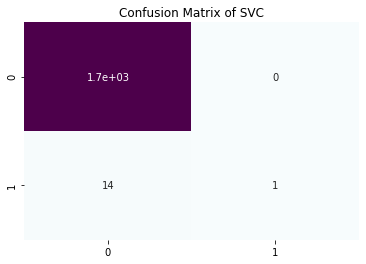

In [74]:
#Plotting Confusion matrix for svc
confusionmatrix=confusion_matrix(y_test,pred_svc)
sns.heatmap(confusionmatrix,annot=True,cbar=False,cmap="BuPu")

plt.title("Confusion Matrix of SVC")
plt.show()

In [75]:
#AucRoc Curve and Auc Score
from sklearn.metrics import roc_curve,roc_auc_score
ypredprob=svc.predict_proba(x_test)[:,1]
ypredprob

array([0.00895666, 0.00301065, 0.00775711, ..., 0.00887852, 0.00544252,
       0.00876037])

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,ypredprob)

In [77]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.88928151e-04,
       5.88928151e-04, 1.17785630e-03, 1.17785630e-03, 2.35571260e-03,
       2.35571260e-03, 3.53356890e-03, 3.53356890e-03, 1.29564193e-02,
       1.29564193e-02, 2.75618375e-01, 2.75618375e-01, 3.29799764e-01,
       3.29799764e-01, 3.85159011e-01, 3.85159011e-01, 1.00000000e+00])

In [78]:
tpr

array([0.        , 0.06666667, 0.13333333, 0.13333333, 0.26666667,
       0.26666667, 0.46666667, 0.46666667, 0.66666667, 0.66666667,
       0.73333333, 0.73333333, 0.8       , 0.8       , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

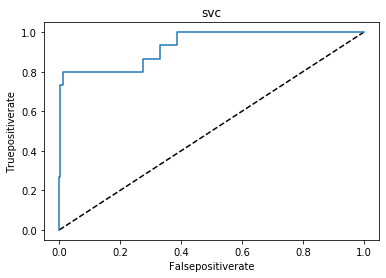

In [79]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="svc")
plt.xlabel("Falsepositiverate")
plt.ylabel("Truepositiverate")
plt.title("svc")
plt.show()

In [80]:
auc_score=roc_auc_score(y_test,svc.predict(x_test))

In [81]:
auc_score

0.5333333333333333

Even then we are having bad auc_score so lets try some ensemble techniques

# Ensemble Techniques

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [83]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

In [84]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("_________________________________________________________________________________________")
    print('\n')

Accuracy of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is :
0.9918272037361354
[[1697    1]
 [  13    2]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1698
           1       0.67      0.13      0.22        15

    accuracy                           0.99      1713
   macro avg       0.83      0.57      0.61      1713
weighted avg       0.99      0.99      0.99      1713

______________________________________________________________

In [79]:
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("Model ",m)
    print("Score ",score)
    print('Mean score :',score.mean())
    print("Standard Deviation :",score.std())
    print("______________________________________________________________________________________________")
    print('\n')

Model  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score  [0.99229782 0.99486521 0.99743261 0.98971722 0.99357326 0.99100257
 0.98971722 0.99228792 0.98971722 0.99228792]
Mean score : 0.9922898977332352
Standard Deviation : 0.0023714965358797046
______________________________________________________________________________________________


Model  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score  [0.99



      |    Accuracy||Cross Val Score | | Std of cross val|

RandomForest:                   0.9918272037361354,0.992161363028865,0.0024027474582227377

AdaBoostClassifier:             0.9912434325744308,0.9919046236193656,0.0017319817765522481

GradientBoostingClassifier:     0.9906596614127262,0.9892068798241764,0.0031066106507634875

BaggingClassifier:              0.99241097489784, 0.9916475542106253,0.002172165383507606

ExtraTreesClassifier:           0.9918272037361354,0.9920328283244949,0.002286777975524992


In [85]:
#Lets save GradientBoostingClassifier as best model and see the auc score

# GradientBoostingClassifier

In [93]:
b=GradientBoostingClassifier()
b.fit(x_train,y_train)
b.score(x_train,y_train)
predg=b.predict(x_test)
print("Accuracy of ",m,"is :")
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))
print("_________________________________________________________________________________________")
print('\n')

Accuracy of  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False) is :
0.9906596614127262
[[1690    8]
 [   8    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1698
           1       0.47      0.47      0.47        15

    accuracy                           0.99      1713
   macro avg       0.73      0.73      0.73      1713
weighted avg       0.99      0.99      0.99      1713

_____________________________________________________________________________

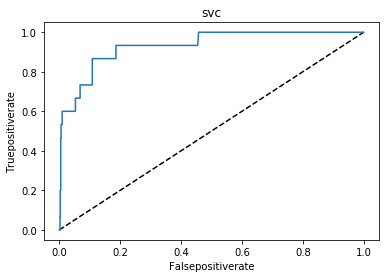

0.5663722025912838

In [95]:
ypredprob=b.predict_proba(x_test)[:,1]
ypredprob
fpr,tpr,thresholds=roc_curve(y_test,ypredprob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="svc")
plt.xlabel("Falsepositiverate")
plt.ylabel("Truepositiverate")
plt.title("svc")
plt.show()
auc_score=roc_auc_score(y_test,m.predict(x_test))
auc_score

# Hypertuning GradientBooster

In [96]:
#Lets hypertune The gradient Boosting and check auc score

In [98]:
parameters={'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}
gbc=GradientBoostingClassifier()
bgbc=GridSearchCV(gbc,parameters)
bgbc.fit(x,y)
bgbc.best_params_

{'learning_rate': 0.01}

In [99]:
parameters={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]}
gbc=GradientBoostingClassifier()
bgbc=GridSearchCV(gbc,parameters)
bgbc.fit(x,y)
bgbc.best_params_

{'n_estimators': 2}

In [100]:
g1=GradientBoostingClassifier(learning_rate= 0.01,n_estimators= 2)
g1.fit(x_train,y_train)
g1.score(x_train,y_train)
predg1=m.predict(x_test)
print("Accuracy of ",m,"is :")
print(accuracy_score(y_test,predg1))
print(confusion_matrix(y_test,predg1))
print(classification_report(y_test,predg1))
print("_________________________________________________________________________________________")
print('\n')

Accuracy of  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False) is :
0.9918272037361354
[[1697    1]
 [  13    2]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1698
           1       0.67      0.13      0.22        15

    accuracy                           0.99      1713
   macro avg       0.83      0.57      0.61      1713
weighted avg       0.99      0.99      0.99      1713

_____________________________________________________________________________

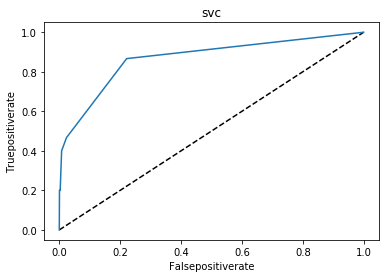

0.5663722025912838

In [101]:
ypredprob=g1.predict_proba(x_test)[:,1]
ypredprob
fpr,tpr,thresholds=roc_curve(y_test,ypredprob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="svc")
plt.xlabel("Falsepositiverate")
plt.ylabel("Truepositiverate")
plt.title("svc")
plt.show()
auc_score=roc_auc_score(y_test,m.predict(x_test))
auc_score

In [103]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(g1,"space_best_model.obj")

['space_best_model.obj']